# Exploratory Data analysis on Red Wine Dataset


The project is aimed at looking and finding deep insights of the white wine dataset. The report also aims in bringing us to a conclusion so as to what are the factors that affect the quality of wine.

The data used is based on the wine quality dataset as recommended by Shreyas Sir. The features of the dataset are as follows , This dataset has 13 variables which contains 9 variables of ingredient, 2 variables of physical properity, 1 variable of quantity and 1 of quality. The dataset are of the size 4989 , 13. The libraries used for the data are , tidyverse and GGally. The libraries are used for visualization which can help us to come to conclusion.


In [7]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Data Description

Data description

The data is in csv format.In computing, a comma-separated values (CSV) file stores tabular data (numbers and text) in plain text. Each line of the file is a data record. Each record consists of one or more fields, separated by commas.

All wines are produced in a particular area of Portugal. Data are collected on 12 different properties of the wines one of which is Quality, based on sensory data, and the rest are on chemical properties of the wines including density, acidity, alcohol content etc. All chemical properties of wines are continuous variables. Quality is an ordinal variable with possible ranking from 1 (worst) to 10 (best). Each variety of wine is tasted by three independent tasters and the final rank assigned is the median rank given by the tasters.

## Attribute Information
For more information, read [Cortez et al., 2009]. Input variables (based on physicochemical tests):

1.fixed acidity

2.volatile acidity

3.citric acid

4.residual sugar

5.chlorides

6.free sulfur dioxide

7.total sulfur dioxide

8.density

9.pH

10.sulphates

11.alcohol Output variable (based on sensory data):

12.quality (score between 0 and 10)


![image](https://www.montecreekranchwinery.com/wp-content/uploads/2017/04/wine-lineup-spring-2017-1024x321.png)

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
df=pd.read_csv("https://raw.githubusercontent.com/Shreyas3108/May28thMLbatcj/master/wineQualityWhites.csv")

Now, we will view our imported data frame by making use of the head function to show first 5 rows.

In [14]:
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [15]:
df.pop("Unnamed: 0")

0          1
1          2
2          3
3          4
4          5
5          6
6          7
7          8
8          9
9         10
10        11
11        12
12        13
13        14
14        15
15        16
16        17
17        18
18        19
19        20
20        21
21        22
22        23
23        24
24        25
25        26
26        27
27        28
28        29
29        30
        ... 
4868    4869
4869    4870
4870    4871
4871    4872
4872    4873
4873    4874
4874    4875
4875    4876
4876    4877
4877    4878
4878    4879
4879    4880
4880    4881
4881    4882
4882    4883
4883    4884
4884    4885
4885    4886
4886    4887
4887    4888
4888    4889
4889    4890
4890    4891
4891    4892
4892    4893
4893    4894
4894    4895
4895    4896
4896    4897
4897    4898
Name: Unnamed: 0, Length: 4898, dtype: int64

In [28]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [16]:
df.shape

(4898, 12)

In [17]:
df.size

58776

In [21]:
df.describe(include="all")

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [22]:
df.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Univariate Analysis
Uni means one. Univariate means one variable analysis. The key pointers to the Univaraite analysis are to find out the outliers present in the data. We also tend to find the dsitribution of the data on the dataset which can further help us for the Bivaraite/Multivariate analysis.


## Fixed.acidity  Count Plot

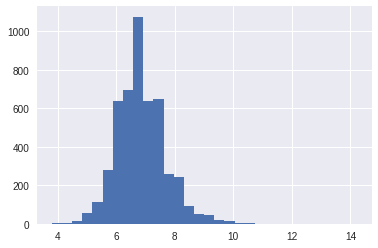

In [31]:
plt.hist(x="fixed.acidity",data=df,bins=30)
sns.despine()

From the above plot, we noticed that:
1.   It is a normal distribution. 
2.   There are few outliers.
3.   It is continuous.
4.   It is bell shaped graph.
5.   Most of the wines have acidity around 7.

## Volatile.acidity Count Plot

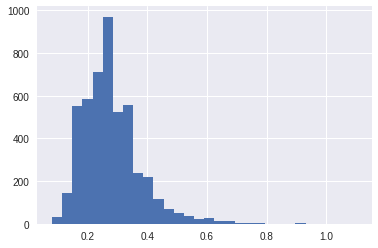

In [34]:
plt.hist(x="volatile.acidity",data=df,bins=30)
sns.despine()

From the above plot we can see that,
1.  It is continuous.
2.  The destribution is skewed.
3.   Most of the wine has 0.25 volatile acidity.
4.   The value of volatile acidity is less for most of the wines.

## Citric.Acid Count Plot

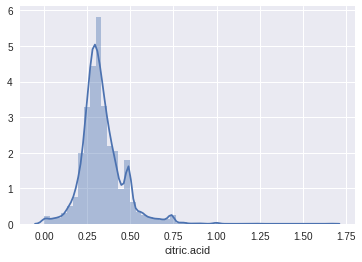

In [42]:
sns.distplot(df["citric.acid"])
sns.despine()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


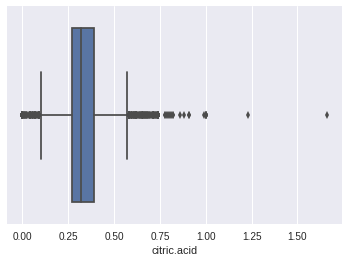

In [41]:
sns.boxplot(df["citric.acid"])
sns.despine()

1. It is continuous.
2. The skewness can be observed.
3.  Most of the wines have citric acid ranging from 0.25 to 0.5.
4.  There are many outliers.

## Residual.sugar Count Plot

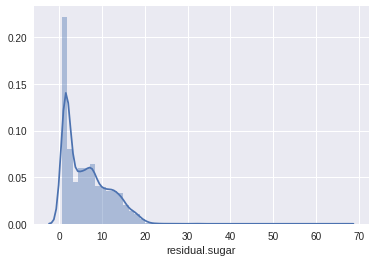

In [40]:
sns.distplot(df["residual.sugar"])
sns.despine()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


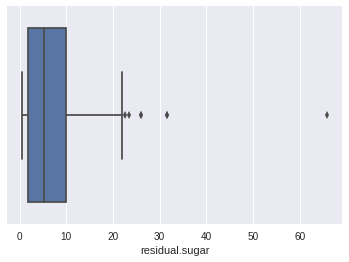

In [43]:
sns.boxplot(df["residual.sugar"])
sns.despine()

It can be seen that,
1.  The graph is skewed.
2.  It is continuous.
3.  Most of the wines have 0 to 10 units of residual sugar.
4.  There are outliers.

## Chloride- Count plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


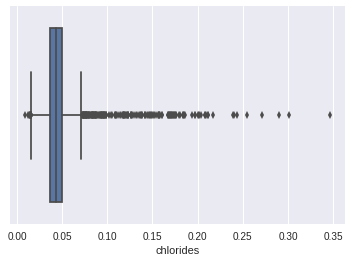

In [45]:
sns.boxplot(df["chlorides"])
sns.despine()

It is observered that ,
1.  The graph is skewed.
2.   It is Continuous.
3.   It has many outliers.
4.   0.05 is the amount of chlorides in most wines.

## Free.sulfur.dioxide - Count plot

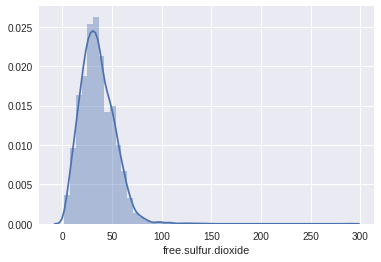

In [48]:
sns.distplot(df["free.sulfur.dioxide"])
sns.despine()

It is seen that,
1. It is continuous.
2. The skewness can be observed.
3.  Most of the wines have citric acid ranging from 0 to 50.
4.  There are many outliers.

## Total.sulfur.dioxide - Count Plot

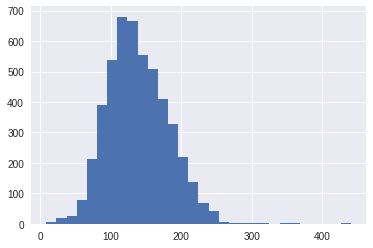

In [51]:
plt.hist(df["total.sulfur.dioxide"],bins=30)
sns.despine()

1.  There are large number of Outliers.
2.  They are continuous in nature.
3.  The distribution is skewed
4.  There are 100-200 total sulfur dioxide in most of the wines. 

## Density - Count Plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


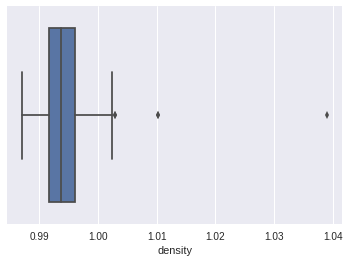

In [52]:
sns.boxplot(df["density"])
sns.despint